Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [ ]:
NAME = "Francis Emmanuel Calingo"
COLLABORATORS = ""

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris. Alternatively, you can import the data using sklearn.datasets. You will need to dowload both the sepal/petal data and the target variable information, then merge the two datasets.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.**
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting).

5. _(2 points)_ **Prepare the data for classification**.
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`.
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part.
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


***Question #3: Downloading and Setting Up***

In [ ]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Data download from sklearn
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])

# Remember to merge the DataFrames into one after they are created.

In [ ]:
## TYPE YOUR CODE HERE

In [ ]:
Iris_data=pd.concat([df_data,df_target],
                           join='outer', axis=1)

In [ ]:
Iris_data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


***Question 4: Data Inspection***

In [ ]:
Iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
Iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
Iris_data.corr()
#Initial assessments appear to show that petal length and width are more correlated with class
#than sepal length and width

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [ ]:
Iris_sepal=pd.concat([Iris_data['sepal_length'], Iris_data['sepal_width'], Iris_data['target']],join='outer', axis=1)
Iris_sepal

,sepal_length,sepal_width,target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


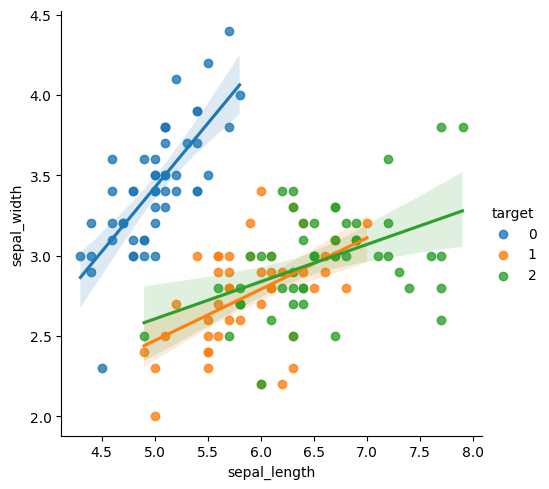

In [ ]:
import seaborn
sns.lmplot( Iris_sepal,x="sepal_length", y="sepal_width",
         markers='o',
         hue='target')

In [ ]:
Iris_petal=pd.concat([Iris_data['petal_length'], Iris_data['petal_width'], Iris_data['target']],join='outer', axis=1)
Iris_petal

,petal_length,petal_width,target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


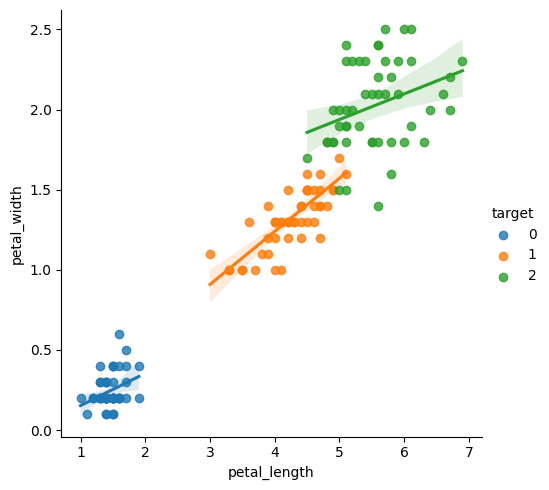

In [ ]:
sns.lmplot( Iris_petal,x="petal_length", y="petal_width",
         markers='o',
         hue='target')

***Question #5: Data Classification Preparation***

In [ ]:
# Define X and Y variables for the regression.
Y = Iris_data.target[:-1].values
X = Iris_data[['sepal_length','sepal_width','petal_length','petal_width']][:-1].values
#In KNN analysis, it is best to convert the dataframes into arrays, as the train test split function will only take arrays as arguements.

In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

***Question #6: Split***

In [ ]:
# Split dataset into random train and test subsets (25% is usually the best test size i.e. 38 OUT OF 150):
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

***Question #7: Running the Fit***

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

***Question #8: Predicting Class from Features***

In [ ]:
Y_predict = knn.predict(X_test)

In [ ]:
Y_predict

array([2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 0, 1,
       2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1])

In [ ]:
(Y_predict==Y_test).sum()
#37 our of 38 predictions were correct, implying a high accuracy score

37

In [ ]:
(Y_predict!=Y_test).sum()

1

In [ ]:
print(knn.score(X_train, Y_train))
print(knn.score(X_test, Y_test))

0.9819819819819819
0.9736842105263158


***Question 9: Random Test Splits for 10 Different K values***

In [ ]:
#First random train/test split for K=3
K3_i=knn.score(X_test, Y_test)
Y3_i=(Y_predict==Y_test).sum()
print(Y3_i) #Number of correct predictions in split
print(K3_i) #Accuracy score of split

38
1.0


In [ ]:
#Rerun random train/test split for K=3 9 more times
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K3_ii=knn.score(X_test, Y_test)
Y3_ii=(Y_predict==Y_test).sum()
print(Y3_ii)
print(K3_ii)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K3_iii=knn.score(X_test, Y_test)
Y3_iii=(Y_predict==Y_test).sum()
print(Y3_iii)
print(K3_iii)

38
1.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K3_iv=knn.score(X_test, Y_test)
Y3_iv=(Y_predict==Y_test).sum()
print(Y3_iv)
print(K3_iv)

35
0.9210526315789473


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K3_v=knn.score(X_test, Y_test)
Y3_v=(Y_predict==Y_test).sum()
print(Y3_v)
print(K3_v)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K3_vi=knn.score(X_test, Y_test)
Y3_vi=(Y_predict==Y_test).sum()
print(Y3_vi)
print(K3_vi)

35
0.9210526315789473


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K3_vii=knn.score(X_test, Y_test)
Y3_vii=(Y_predict==Y_test).sum()
print(Y3_vii)
print(K3_vii)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K3_viii=knn.score(X_test, Y_test)
Y3_viii=(Y_predict==Y_test).sum()
print(Y3_viii)
print(K3_viii)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K3_ix=knn.score(X_test, Y_test)
Y3_ix=(Y_predict==Y_test).sum()
print(Y3_ix)
print(K3_ix)

35
0.9210526315789473


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K3_x=knn.score(X_test, Y_test)
Y3_x=(Y_predict==Y_test).sum()
print(Y3_x)
print(K3_x)

38
1.0


In [ ]:
#Average of accuracy scores of the 10 random train/test splits for K=3
Accuracy_Avg_K3=(K3_i+K3_ii+K3_iii+K3_iv+K3_v+K3_vi+K3_vii+K3_viii+K3_ix+K3_x)/10
Accuracy_Avg_K3

0.9578947368421054

In [ ]:
#Average of number of correct predictions of the 10 random train/test splits for K=3
CorrectPred_Avg_Y3=(Y3_i+Y3_ii+Y3_iii+Y3_iv+Y3_v+Y3_vi+Y3_vii+Y3_viii+Y3_ix+Y3_x)/10
CorrectPred_Avg_Y3

36.4

In [ ]:
#10 random train/test split for K=1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K1_i=knn.score(X_test, Y_test)
Y1_i=(Y_predict==Y_test).sum()
print(Y1_i)
print(K1_i)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K1_ii=knn.score(X_test, Y_test)
Y1_ii=(Y_predict==Y_test).sum()
print(Y1_ii)
print(K1_ii)

35
0.9210526315789473


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K1_iii=knn.score(X_test, Y_test)
Y1_iii=(Y_predict==Y_test).sum()
print(Y1_iii)
print(K1_iii)

35
0.9210526315789473


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K1_iv=knn.score(X_test, Y_test)
Y1_iv=(Y_predict==Y_test).sum()
print(Y1_iv)
print(K1_iv)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K1_v=knn.score(X_test, Y_test)
Y1_v=(Y_predict==Y_test).sum()
print(Y1_v)
print(K1_v)

35
0.9210526315789473


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K1_vi=knn.score(X_test, Y_test)
Y1_vi=(Y_predict==Y_test).sum()
print(Y1_vi)
print(K1_vi)

35
0.9210526315789473


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K1_vii=knn.score(X_test, Y_test)
Y1_vii=(Y_predict==Y_test).sum()
print(Y1_vii)
print(K1_vii)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K1_viii=knn.score(X_test, Y_test)
Y1_viii=(Y_predict==Y_test).sum()
print(Y1_viii)
print(K1_viii)

38
1.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K1_ix=knn.score(X_test, Y_test)
Y1_ix=(Y_predict==Y_test).sum()
print(Y1_ix)
print(K1_ix)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K1_x=knn.score(X_test, Y_test)
Y1_x=(Y_predict==Y_test).sum()
print(Y1_x)
print(K1_x)

38
1.0


In [ ]:
#Average of accuracy scores of the 10 random train/test splits for K=1
Accuracy_Avg_K1=(K1_i+K1_ii+K1_iii+K1_iv+K1_v+K1_vi+K1_vii+K1_viii+K1_ix+K1_x)/10
Accuracy_Avg_K1

0.9578947368421054

In [ ]:
#Average of number of correct predictions of the 10 random train/test splits for K=1
CorrectPred_Avg_Y1=(Y1_i+Y1_ii+Y1_iii+Y1_iv+Y1_v+Y1_vi+Y1_vii+Y1_viii+Y1_ix+Y1_x)/10
CorrectPred_Avg_Y1

36.4

In [ ]:
#10 random train/test split for K=5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K5_i=knn.score(X_test, Y_test)
Y5_i=(Y_predict==Y_test).sum()
print(Y5_i)
print(K5_i)

35
0.9210526315789473


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K5_ii=knn.score(X_test, Y_test)
Y5_ii=(Y_predict==Y_test).sum()
print(Y5_ii)
print(K5_ii)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K5_iii=knn.score(X_test, Y_test)
Y5_iii=(Y_predict==Y_test).sum()
print(Y5_iii)
print(K5_iii)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K5_iv=knn.score(X_test, Y_test)
Y5_iv=(Y_predict==Y_test).sum()
print(Y5_iv)
print(K5_iv)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K5_v=knn.score(X_test, Y_test)
Y5_v=(Y_predict==Y_test).sum()
print(Y5_v)
print(K5_v)

38
1.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K5_vi=knn.score(X_test, Y_test)
Y5_vi=(Y_predict==Y_test).sum()
print(Y5_vi)
print(K5_vi)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K5_vii=knn.score(X_test, Y_test)
Y5_vii=(Y_predict==Y_test).sum()
print(Y5_vii)
print(K5_vii)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K5_viii=knn.score(X_test, Y_test)
Y5_viii=(Y_predict==Y_test).sum()
print(Y5_viii)
print(K5_viii)

38
1.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K5_ix=knn.score(X_test, Y_test)
Y5_ix=(Y_predict==Y_test).sum()
print(Y5_ix)
print(K5_ix)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K5_x=knn.score(X_test, Y_test)
Y5_x=(Y_predict==Y_test).sum()
print(Y5_x)
print(K5_x)

37
0.9736842105263158


In [ ]:
#Average of accuracy scores of the 10 random train/test splits for K=5
Accuracy_Avg_K5=(K5_i+K5_ii+K5_iii+K5_iv+K5_v+K5_vi+K5_vii+K5_viii+K5_ix+K5_x)/10
Accuracy_Avg_K5

0.9657894736842104

In [ ]:
#Average of number of correct predictions of the 10 random train/test splits for K=5
CorrectPred_Avg_Y5=(Y5_i+Y5_ii+Y5_iii+Y5_iv+Y5_v+Y5_vi+Y5_vii+Y5_viii+Y5_ix+Y5_x)/10
CorrectPred_Avg_Y5

36.7

In [ ]:
#10 random train/test split for K=7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K7_i=knn.score(X_test, Y_test)
Y7_i=(Y_predict==Y_test).sum()
print(Y7_i)
print(K7_i)

38
1.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K7_ii=knn.score(X_test, Y_test)
Y7_ii=(Y_predict==Y_test).sum()
print(Y7_ii)
print(K7_ii)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K7_iii=knn.score(X_test, Y_test)
Y7_iii=(Y_predict==Y_test).sum()
print(Y7_iii)
print(K7_iii)

38
1.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K7_iv=knn.score(X_test, Y_test)
Y7_iv=(Y_predict==Y_test).sum()
print(Y7_iv)
print(K7_iv)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K7_v=knn.score(X_test, Y_test)
Y7_v=(Y_predict==Y_test).sum()
print(Y7_v)
print(K7_v)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K7_vi=knn.score(X_test, Y_test)
Y7_vi=(Y_predict==Y_test).sum()
print(Y7_vi)
print(K7_vi)

38
1.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K7_vii=knn.score(X_test, Y_test)
Y7_vii=(Y_predict==Y_test).sum()
print(Y7_vii)
print(K7_vii)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K7_viii=knn.score(X_test, Y_test)
Y7_viii=(Y_predict==Y_test).sum()
print(Y7_viii)
print(K7_viii)

38
1.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K7_ix=knn.score(X_test, Y_test)
Y7_ix=(Y_predict==Y_test).sum()
print(Y7_ix)
print(K7_ix)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K7_x=knn.score(X_test, Y_test)
Y7_x=(Y_predict==Y_test).sum()
print(Y7_x)
print(K7_x)

38
1.0


In [ ]:
#Average of accuracy scores of the 10 random train/test splits for K=7
Accuracy_Avg_K7=(K7_i+K7_ii+K7_iii+K7_iv+K7_v+K7_vi+K7_vii+K7_viii+K7_ix+K7_x)/10
Accuracy_Avg_K7

0.9815789473684211

In [ ]:
#Average of number of correct predictions of the 10 random train/test splits for K=7
CorrectPred_Avg_Y7=(Y7_i+Y7_ii+Y7_iii+Y7_iv+Y7_v+Y7_vi+Y7_vii+Y7_viii+Y7_ix+Y7_x)/10
CorrectPred_Avg_Y7

37.3

In [ ]:
#10 random train/test split for K=10
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K10_i=knn.score(X_test, Y_test)
Y10_i=(Y_predict==Y_test).sum()
print(Y10_i)
print(K10_i)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K10_ii=knn.score(X_test, Y_test)
Y10_ii=(Y_predict==Y_test).sum()
print(Y10_ii)
print(K10_ii)

35
0.9210526315789473


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K10_iii=knn.score(X_test, Y_test)
Y10_iii=(Y_predict==Y_test).sum()
print(Y10_iii)
print(K10_iii)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K10_iv=knn.score(X_test, Y_test)
Y10_iv=(Y_predict==Y_test).sum()
print(Y10_iv)
print(K10_iv)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K10_v=knn.score(X_test, Y_test)
Y10_v=(Y_predict==Y_test).sum()
print(Y10_v)
print(K10_v)

38
1.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K10_vi=knn.score(X_test, Y_test)
Y10_vi=(Y_predict==Y_test).sum()
print(Y10_vi)
print(K10_vi)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K10_vii=knn.score(X_test, Y_test)
Y10_vii=(Y_predict==Y_test).sum()
print(Y10_vii)
print(K10_vii)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K10_viii=knn.score(X_test, Y_test)
Y10_viii=(Y_predict==Y_test).sum()
print(Y10_viii)
print(K10_viii)

38
1.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K10_ix=knn.score(X_test, Y_test)
Y10_ix=(Y_predict==Y_test).sum()
print(Y10_ix)
print(K10_ix)

35
0.9210526315789473


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K10_x=knn.score(X_test, Y_test)
Y10_x=(Y_predict==Y_test).sum()
print(Y10_x)
print(K10_x)

36
0.9473684210526315


In [ ]:
#Average of accuracy scores of the 10 random train/test splits for K=10
Accuracy_Avg_K10=(K10_i+K10_ii+K10_iii+K10_iv+K10_v+K10_vi+K10_vii+K10_viii+K10_ix+K10_x)/10
Accuracy_Avg_K10

0.9552631578947368

In [ ]:
#Average of number of correct predictions of the 10 random train/test splits for K=10
CorrectPred_Avg_Y10=(Y10_i+Y10_ii+Y10_iii+Y10_iv+Y10_v+Y10_vi+Y10_vii+Y10_viii+Y10_ix+Y10_x)/10
CorrectPred_Avg_Y10

36.3

In [ ]:
#10 random train/test split for K=20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K20_i=knn.score(X_test, Y_test)
Y20_i=(Y_predict==Y_test).sum()
print(Y20_i)
print(K20_i)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K20_ii=knn.score(X_test, Y_test)
Y20_ii=(Y_predict==Y_test).sum()
print(Y20_ii)
print(K20_ii)

33
0.868421052631579


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K20_iii=knn.score(X_test, Y_test)
Y20_iii=(Y_predict==Y_test).sum()
print(Y20_iii)
print(K20_iii)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K20_iv=knn.score(X_test, Y_test)
Y20_iv=(Y_predict==Y_test).sum()
print(Y20_iv)
print(K20_iv)

35
0.9210526315789473


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K20_v=knn.score(X_test, Y_test)
Y20_v=(Y_predict==Y_test).sum()
print(Y20_v)
print(K20_v)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K20_vi=knn.score(X_test, Y_test)
Y20_vi=(Y_predict==Y_test).sum()
print(Y20_vi)
print(K20_vi)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K20_vii=knn.score(X_test, Y_test)
Y20_vii=(Y_predict==Y_test).sum()
print(Y20_vii)
print(K20_vii)

38
1.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K20_viii=knn.score(X_test, Y_test)
Y20_viii=(Y_predict==Y_test).sum()
print(Y20_viii)
print(K20_viii)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K20_ix=knn.score(X_test, Y_test)
Y20_ix=(Y_predict==Y_test).sum()
print(Y20_ix)
print(K20_ix)

38
1.0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K20_x=knn.score(X_test, Y_test)
Y20_x=(Y_predict==Y_test).sum()
print(Y20_x)
print(K20_x)

34
0.8947368421052632


In [ ]:
#Average of accuracy scores of the 10 random train/test splits for K=20
Accuracy_Avg_K20=(K20_i+K20_ii+K20_iii+K20_iv+K20_v+K20_vi+K20_vii+K20_viii+K20_ix+K20_x)/10
Accuracy_Avg_K20

0.955263157894737

In [ ]:
#Average of number of correct predictions of the 10 random train/test splits for K=20
CorrectPred_Avg_Y20=(Y20_i+Y20_ii+Y20_iii+Y20_iv+Y20_v+Y20_vi+Y20_vii+Y20_viii+Y20_ix+Y20_x)/10
CorrectPred_Avg_Y20

36.3

In [ ]:
#10 random train/test split for K=30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K30_i=knn.score(X_test, Y_test)
Y30_i=(Y_predict==Y_test).sum()
print(Y30_i)
print(K30_i)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K30_ii=knn.score(X_test, Y_test)
Y30_ii=(Y_predict==Y_test).sum()
print(Y30_ii)
print(K30_ii)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K30_iii=knn.score(X_test, Y_test)
Y30_iii=(Y_predict==Y_test).sum()
print(Y30_iii)
print(K30_iii)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K30_iv=knn.score(X_test, Y_test)
Y30_iv=(Y_predict==Y_test).sum()
print(Y30_iv)
print(K30_iv)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K30_v=knn.score(X_test, Y_test)
Y30_v=(Y_predict==Y_test).sum()
print(Y30_v)
print(K30_v)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K30_vi=knn.score(X_test, Y_test)
Y30_vi=(Y_predict==Y_test).sum()
print(Y30_vi)
print(K30_vi)

35
0.9210526315789473


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K30_vii=knn.score(X_test, Y_test)
Y30_vii=(Y_predict==Y_test).sum()
print(Y30_vii)
print(K30_vii)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K30_viii=knn.score(X_test, Y_test)
Y30_viii=(Y_predict==Y_test).sum()
print(Y30_viii)
print(K30_viii)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K30_ix=knn.score(X_test, Y_test)
Y30_ix=(Y_predict==Y_test).sum()
print(Y30_ix)
print(K30_ix)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K30_x=knn.score(X_test, Y_test)
Y30_x=(Y_predict==Y_test).sum()
print(Y30_x)
print(K30_x)

37
0.9736842105263158


In [ ]:
#Average of accuracy scores of the 10 random train/test splits for K=30
Accuracy_Avg_K30=(K30_i+K30_ii+K30_iii+K30_iv+K30_v+K30_vi+K30_vii+K30_viii+K30_ix+K30_x)/10
Accuracy_Avg_K30

0.95

In [ ]:
#Average of number of correct predictions of the 10 random train/test splits for K=30
CorrectPred_Avg_Y30=(Y30_i+Y30_ii+Y30_iii+Y30_iv+Y30_v+Y30_vi+Y30_vii+Y30_viii+Y30_ix+Y30_x)/10
CorrectPred_Avg_Y30

36.1

In [ ]:
#10 random train/test split for K=40
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K40_i=knn.score(X_test, Y_test)
Y40_i=(Y_predict==Y_test).sum()
print(Y40_i)
print(K40_i)

33
0.868421052631579


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K40_ii=knn.score(X_test, Y_test)
Y40_ii=(Y_predict==Y_test).sum()
print(Y40_ii)
print(K40_ii)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K40_iii=knn.score(X_test, Y_test)
Y40_iii=(Y_predict==Y_test).sum()
print(Y40_iii)
print(K40_iii)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K40_iv=knn.score(X_test, Y_test)
Y40_iv=(Y_predict==Y_test).sum()
print(Y40_iv)
print(K40_iv)

32
0.8421052631578947


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K40_v=knn.score(X_test, Y_test)
Y40_v=(Y_predict==Y_test).sum()
print(Y40_v)
print(K40_v)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K40_vi=knn.score(X_test, Y_test)
Y40_vi=(Y_predict==Y_test).sum()
print(Y40_vi)
print(K40_vi)

33
0.868421052631579


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K40_vii=knn.score(X_test, Y_test)
Y40_vii=(Y_predict==Y_test).sum()
print(Y40_vii)
print(K40_vii)

34
0.8947368421052632


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K40_viii=knn.score(X_test, Y_test)
Y40_viii=(Y_predict==Y_test).sum()
print(Y40_viii)
print(K40_viii)

33
0.868421052631579


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K40_ix=knn.score(X_test, Y_test)
Y40_ix=(Y_predict==Y_test).sum()
print(Y40_ix)
print(K40_ix)

35
0.9210526315789473


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K40_x=knn.score(X_test, Y_test)
Y40_x=(Y_predict==Y_test).sum()
print(Y40_x)
print(K40_x)

35
0.9210526315789473


In [ ]:
#Average of accuracy scores of the 10 random train/test splits for K=40
Accuracy_Avg_K40=(K40_i+K40_ii+K40_iii+K40_iv+K40_v+K40_vi+K40_vii+K40_viii+K40_ix+K40_x)/10
Accuracy_Avg_K40

0.9052631578947367

In [ ]:
#Average of number of correct predictions of the 10 random train/test splits for K=40
CorrectPred_Avg_Y40=(Y40_i+Y40_ii+Y40_iii+Y40_iv+Y40_v+Y40_vi+Y40_vii+Y40_viii+Y40_ix+Y40_x)/10
CorrectPred_Avg_Y40

34.4

In [ ]:
#10 random train/test split for K=50
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K50_i=knn.score(X_test, Y_test)
Y50_i=(Y_predict==Y_test).sum()
print(Y50_i)
print(K50_i)

33
0.868421052631579


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K50_ii=knn.score(X_test, Y_test)
Y50_ii=(Y_predict==Y_test).sum()
print(Y50_ii)
print(K50_ii)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K50_iii=knn.score(X_test, Y_test)
Y50_iii=(Y_predict==Y_test).sum()
print(Y50_iii)
print(K50_iii)

33
0.868421052631579


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K50_iv=knn.score(X_test, Y_test)
Y50_iv=(Y_predict==Y_test).sum()
print(Y50_iv)
print(K50_iv)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K50_v=knn.score(X_test, Y_test)
Y50_v=(Y_predict==Y_test).sum()
print(Y50_v)
print(K50_v)

36
0.9473684210526315


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K50_vi=knn.score(X_test, Y_test)
Y50_vi=(Y_predict==Y_test).sum()
print(Y50_vi)
print(K50_vi)

37
0.9736842105263158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K50_vii=knn.score(X_test, Y_test)
Y50_vii=(Y_predict==Y_test).sum()
print(Y50_vii)
print(K50_vii)

34
0.8947368421052632


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K50_viii=knn.score(X_test, Y_test)
Y50_viii=(Y_predict==Y_test).sum()
print(Y50_viii)
print(K50_viii)

32
0.8421052631578947


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K50_ix=knn.score(X_test, Y_test)
Y50_ix=(Y_predict==Y_test).sum()
print(Y50_ix)
print(K50_ix)

35
0.9210526315789473


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)
K50_x=knn.score(X_test, Y_test)
Y50_x=(Y_predict==Y_test).sum()
print(Y50_x)
print(K50_x)

34
0.8947368421052632


In [ ]:
#Average of accuracy scores of the 10 random train/test splits for K=50
Accuracy_Avg_K50=(K50_i+K50_ii+K50_iii+K50_iv+K50_v+K50_vi+K50_vii+K50_viii+K50_ix+K50_x)/10
Accuracy_Avg_K50

0.9105263157894736

In [ ]:
#Average of number of correct predictions of the 10 random train/test splits for K=50
CorrectPred_Avg_Y50=(Y50_i+Y50_ii+Y50_iii+Y50_iv+Y50_v+Y50_vi+Y50_vii+Y50_viii+Y50_ix+Y50_x)/10
CorrectPred_Avg_Y50

34.6

In [ ]:
#Now we can create the plot that compares the average accuracy score for each K values given the results of our
#random train/test splits
K_values = pd.DataFrame([1, 3, 5, 7, 10, 20, 30, 40, 50])
Accuracy_K = pd.DataFrame([Accuracy_Avg_K1, Accuracy_Avg_K3, Accuracy_Avg_K5, Accuracy_Avg_K7,
                          Accuracy_Avg_K10, Accuracy_Avg_K20, Accuracy_Avg_K30, Accuracy_Avg_K40, Accuracy_Avg_K50])
Plot_df = pd.concat([K_values, Accuracy_K], join='outer', axis=1, keys=['K', 'Accuracy Score'])
print(Plot_df)

    K Accuracy Score
    0              0
0   1       0.957895
1   3       0.957895
2   5       0.965789
3   7       0.981579
4  10       0.955263
5  20       0.955263
6  30       0.950000
7  40       0.905263
8  50       0.910526


In [ ]:
if Plot_df.ndim != 1:
    raise ValueError("Plot_df must be a one-dimensional array.")

plt.figure(figsize=(10,6))
plt.plot(range(1,60),Plot_df,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

ValueError: Plot_df must be a one-dimensional array.

Text(0, 0.5, 'Accuracy')

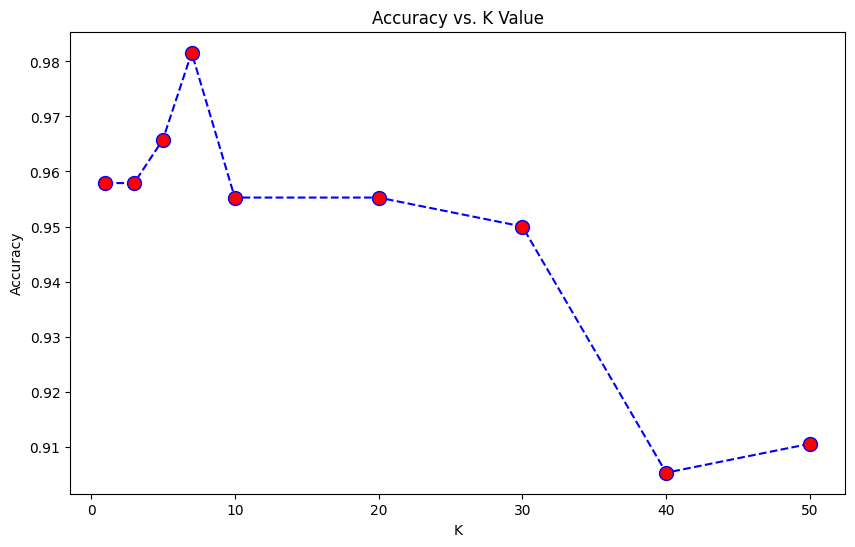

In [ ]:
#Based on the graph, we can conclude that, in general, as K increases, the accuracy of the model decreases.
#Also, the model is most accurate when K=7.
plt.figure(figsize=(10,6))
plt.plot(K_values, Accuracy_K ,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
